In [1]:
using LibPQ, Tables, Plotly, HTTP, CSV

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6149785370130886266\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-2192542045572214580\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-6149785370130886266\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
import Pkg; Pkg.add("CSV")

   Updating registry at `~/.julia/registries/General`
--2020-10-28 19:49:19--  https://pkg.julialang.org/registry/23338594-aafe-5451-b93e-139f81909106/7dc20649788256e18466d002e4055f26ab22d473
Resolving pkg.julialang.org (pkg.julialang.org)... 151.101.194.217, 151.101.130.217, 151.101.66.217, ...
Connecting to pkg.julialang.org (pkg.julialang.org)|151.101.194.217|:443... connected.
HTTP request sent, awaiting response... 301 AS -> IN internal redirect trigger
Location: https://in.pkg.julialang.org/registry/23338594-aafe-5451-b93e-139f81909106/7dc20649788256e18466d002e4055f26ab22d473 [following]
--2020-10-28 19:49:19--  https://in.pkg.julialang.org/registry/23338594-aafe-5451-b93e-139f81909106/7dc20649788256e18466d002e4055f26ab22d473
Resolving in.pkg.julialang.org (in.pkg.julialang.org)... 13.234.116.115
Connecting to in.pkg.julialang.org (in.pkg.julialang.org)|13.234.116.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2351346 (2.2M) [application/tar]
Saving

In [3]:
conn = LibPQ.Connection("dbname=sharath")

PostgreSQL connection (CONNECTION_OK) with parameters:
  user = sharath
  passfile = /home/sharath/.pgpass
  dbname = sharath
  port = 5432
  client_encoding = UTF8
  options = -c DateStyle=ISO,YMD -c IntervalStyle=iso_8601 -c TimeZone=UTC
  application_name = LibPQ.jl
  sslmode = prefer
  sslcompression = 0
  gssencmode = disable
  krbsrvname = postgres
  target_session_attrs = any

In [4]:
result = execute(conn, """select "NDP_Date" , "NDP_Close" from ace_equity_nifty_50 aen where "Company Name" = 'Infosys Ltd.' order by 1""")
data = columntable(result)

(NDP_Date = Union{Missing, Dates.DateTime}[Dates.DateTime("2011-10-03T00:00:00"), Dates.DateTime("2011-10-04T00:00:00"), Dates.DateTime("2011-10-05T00:00:00"), Dates.DateTime("2011-10-07T00:00:00"), Dates.DateTime("2011-10-10T00:00:00"), Dates.DateTime("2011-10-11T00:00:00"), Dates.DateTime("2011-10-12T00:00:00"), Dates.DateTime("2011-10-13T00:00:00"), Dates.DateTime("2011-10-14T00:00:00"), Dates.DateTime("2011-10-17T00:00:00")  …  Dates.DateTime("2020-10-05T00:00:00"), Dates.DateTime("2020-10-06T00:00:00"), Dates.DateTime("2020-10-07T00:00:00"), Dates.DateTime("2020-10-08T00:00:00"), Dates.DateTime("2020-10-09T00:00:00"), Dates.DateTime("2020-10-12T00:00:00"), Dates.DateTime("2020-10-13T00:00:00"), Dates.DateTime("2020-10-14T00:00:00"), Dates.DateTime("2020-10-15T00:00:00"), Dates.DateTime("2020-10-16T00:00:00")], NDP_Close = Union{Missing, Float64}[309.49, 304.81, 305.87, 313.59, 323.74, 313.07, 334.92, 337.09, 342.97, 343.32  …  1048.7, 1055.75, 1066.55, 1093.7, 1106.8, 1132.1, 1157

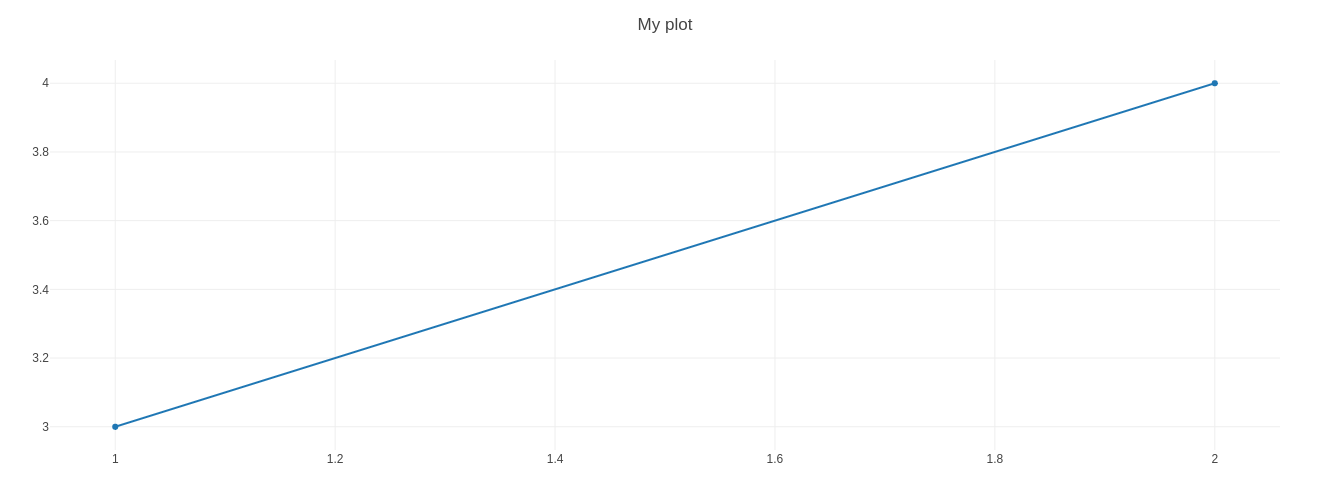

In [2]:
my_plot = plot([scatter(x=[1,2], y=[3,4])], Layout(title="My plot"))


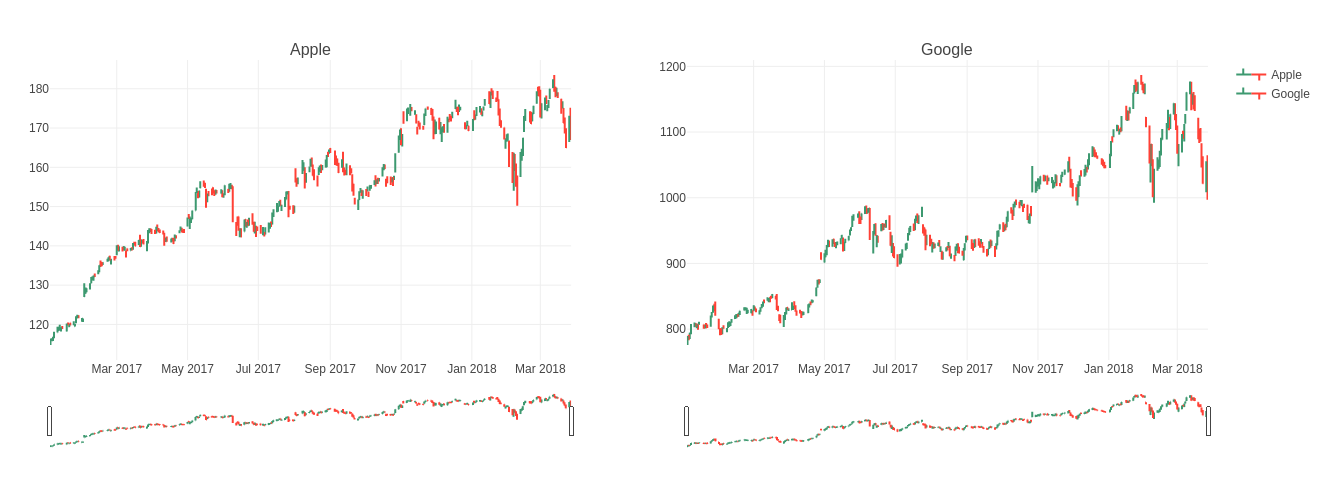

In [13]:
function ohlc2()
    function get_ohlc(ticker; kwargs...)
        res = HTTP.get("https://www.quandl.com/api/v3/datasets/WIKI/$(ticker)/data.csv?start_date=2017-01-01")
        df = CSV.read(res.body)
        ohlc(df, x=:Date, open=:Open, high=:High, low=:Low, close=:Close; kwargs...)
    end

    p1 = plot(get_ohlc("AAPL", name="Apple"), Layout(title="Apple"))
    p2 = plot(get_ohlc("GOOG", name="Google"), Layout(title="Google"))

    [p1 p2]
end
ohlc2()

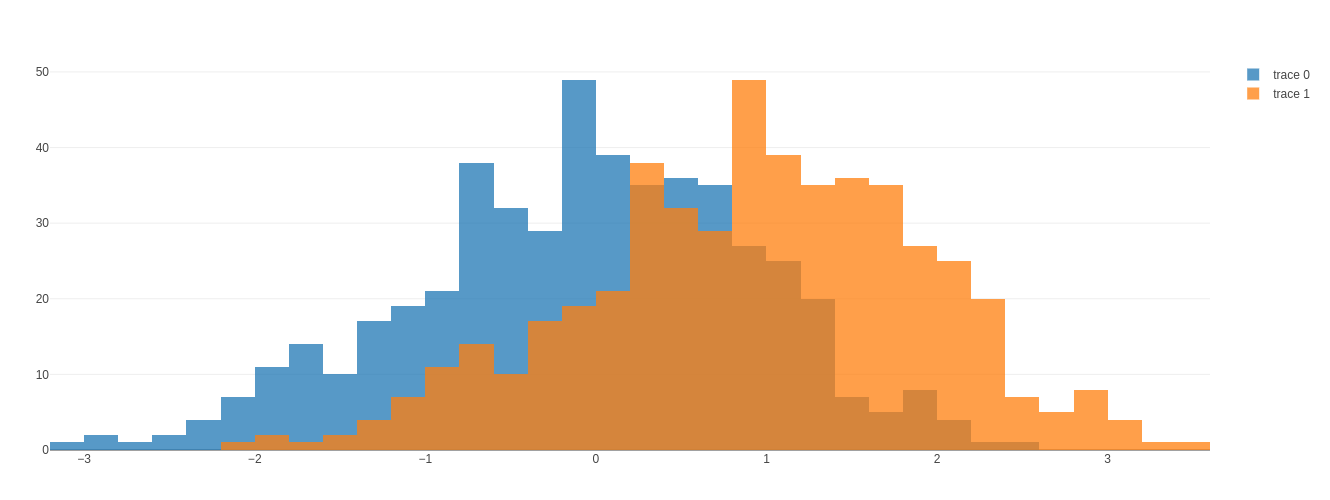

In [14]:
function two_hists()
    x0 = randn(500)
    x1 = x0 .+ 1

    trace1 = histogram(x=x0, opacity=0.75)
    trace2 = histogram(x=x1, opacity=0.75)
    data = [trace1, trace2]
    layout = Layout(barmode="overlay")
    plot(data, layout)
end
two_hists()

In [49]:
function go(r::Number)
    sum::Float64 = 0
    pv::Float64 = 0
    for t = 1:10
        sum += p2(6, r, t)
        pv+=p1(6, 0.05, t)
    end
    println(sum)
    println(p1(sum, 0.05, 10))
end
 go(0.07)

88.70159591141444
54.45508534023414


In [29]:
function p2(p1::Number, r::Number, t::Number)
    return Float64(p1)*((1+Float64(r))^Float64(t))
end

function t(p1::Number, p2::Number, r::Number)
    return log(Float64(p2)/Float64(p1)) / log(1+Float64(r))
end

function p1(p2::Number, r::Number, t::Number)
    return Float64(p2)/((1+Float64(r))^Float64(t))
end

function r(p1::Number, p2::Number, t::Number)
    power = log(Float64(p2)/Float64(p1))/Float64(t)
    return exp(power) - 1
end

function emi(p1::Number, r::Number, t::Number)
    x::Float64 = (1.0 + Float64(r))^Float64(t)
    return Float64(p1) * Float64(r) * x / (x - 1)
end


r (generic function with 1 method)